# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Hormona GLP-1**

### Avance 2: Ingeniería de características

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

### **Asesores**
- Dr. Juan Arturo Nolazco Flores
- Dr. Carlos Alberto Brizuela Rodríguez

#### **Miembros del equipo:**
- Cesar Ivan Herrera Martinez A01796392  
- Juan Antonio Cruz Acosta A01795375 
- Julio Baltazar Colín A01794476 

# Ingenieria de características

#### Configuración del ambiente

## Analisis de secuencias de péptidos

### Analisis de diversidad en las secuencias

#### Carga de los datos del EDA

In [1]:
# carga de archivos y librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Optional
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sys
import os

In [2]:
from pathlib import Path

# ruta del directorio del notebook actual
notebook_dir = Path.cwd()

# Subir un nivel para llegar a la carpeta raíz del proyecto
project_root = notebook_dir.parent

# Añadir la carpeta raíz al path de Python
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"Ruta del proyecto añadida al path: {project_root}")

from src.bio_utils import save_df_as_fasta, fasta_to_dataframe, inspect_fasta_file, calculate_identity_matrix

Ruta del proyecto añadida al path: d:\source\Proyecto Integrador\glp-1_drug_discovery


In [3]:
# Ruta los archivos de datos
directorio_base = Path("../data")
raw_data_dir = directorio_base / "raw"
processed_data_dir = directorio_base / "processed"
ruta_125_ec50= directorio_base/raw_data_dir/ "125_EC50.csv"

# Ruta archivos procesados

# Ruta archivo FASTA filtrado
ruta_fasta_glp1_sec_activa= processed_data_dir / "GLP-1_Activo.fasta"

# Ruta archivo CSV con péptidos GLP-1 identificados
ruta_csv_glp_identificados= processed_data_dir / "glucagon_like_peptides.csv"

# Ruta archivo CSV con péptidos  con actividad EC50
ruta_125_ec50= directorio_base/raw_data_dir/ "125_EC50.csv"


In [4]:
# carga de datos fasta de la proteina GLP-1R
load_gpl1_fasta_results = inspect_fasta_file(ruta_fasta_glp1_sec_activa)

if load_gpl1_fasta_results and load_gpl1_fasta_results['is_valid']:
    print(f"'{ruta_fasta_glp1_sec_activa}' es válido.")
    print(f"Se encontraron {load_gpl1_fasta_results['record_count']} registros válidos.")

df_glp1_sec_activa = fasta_to_dataframe(ruta_fasta_glp1_sec_activa)
print(f"Dimensiones del DataFrame: {df_glp1_sec_activa.shape}")

Inspecting file: ..\data\processed\GLP-1_Activo.fasta...
  - OK! File is structurally valid. Found 897 records.
'..\data\processed\GLP-1_Activo.fasta' es válido.
Se encontraron 897 registros válidos.
Dimensiones del DataFrame: (897, 3)


In [5]:
df_glp1_sec_activa

,id,description,sequence
0,AF-A0A060VXS0-F1,AF-A0A060VXS0-F1,HAEGTYTSDMSSYLQDQAAKEFVSWLKNGR
1,AF-A0A060VY52-F1,AF-A0A060VY52-F1,HAEGTYTSDVSSYLQDQAAKEFVSWLKNGR
2,AF-A0A060WDT4-F1,AF-A0A060WDT4-F1,HADGTYTSDVSTYLQDQAAKDFVSWLKSGL
3,AF-A0A087VEU7-F1,AF-A0A087VEU7-F1,HAEGTYTSDITSYLEGQAAKEFIAWLVNGR
4,AF-A0A087XPV4-F1,AF-A0A087XPV4-F1,HADGTFTSDVSSYLKDQAIKDFVAQLKSGQ
...,...,...,...
892,tr|A0A8C9ICK2|A0A8C9ICK2_9PRIM,tr|A0A8C9ICK2|A0A8C9ICK2_9PRIM,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
893,tr|A0A8I3QXE0|A0A8I3QXE0_CANLF,tr|A0A8I3QXE0|A0A8I3QXE0_CANLF,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
894,tr|F7ID40|F7ID40_CALJA,tr|F7ID40|F7ID40_CALJA,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
895,tr|G1TRR9|G1TRR9_RABIT,tr|G1TRR9|G1TRR9_RABIT,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR


In [6]:
# carga de datos csv de los peptidos GLP-1 identificados y con actividad EC50
try:
    df_glp1_identificados = pd.read_csv(ruta_csv_glp_identificados)
    print(f"Archivo '{ruta_csv_glp_identificados}' cargado correctamente.")
    print(f"Dimensiones del DataFrame: {df_glp1_identificados.shape}")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_csv_glp_identificados}' no se encontró.")

Archivo '..\data\processed\glucagon_like_peptides.csv' cargado correctamente.
Dimensiones del DataFrame: (897, 34)


In [7]:
# carga de datos csv de los peptidos con actividad EC50 para entrenar el modelo
try:
    df_125_ec50 = pd.read_csv(ruta_125_ec50)
    print(f"Archivo '{ruta_125_ec50}' cargado correctamente.")
    print(f"Dimensiones del DataFrame: {df_125_ec50.shape}")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_125_ec50}' no se encontró.")

Archivo '..\data\..\data\raw\125_EC50.csv' cargado correctamente.
Dimensiones del DataFrame: (125, 9)


## Agrupación de secuencias biológicas CD-Hit

### CD-HIT
CD-Hit es una herramienta bioinformática ampliamente utilizada para agrupar secuencias biológicas, como proteínas o ácidos nucleicos, en función de su similitud. Su objetivo principal es reducir la redundancia en grandes conjuntos de datos de secuencias, facilitando el análisis y la interpretación de la información genética o proteica.
se utiliza un algoritmo de clustering rápido y eficiente que agrupa secuencias similares basándose en un umbral de identidad definido por el usuario. Las secuencias que superan este umbral se agrupan en un solo clúster, representado por una secuencia representativa, mientras que las secuencias que no cumplen con el criterio permanecen como secuencias individuales.  
Permite a los investigadores identificar familias de secuencias relacionadas, estudiar la diversidad genética, y optimizar bases de datos de secuencias para análisis posteriores, como la anotación funcional o la predicción estructural. CD-Hit es especialmente útil en estudios de genómica, proteómica y metagenómica, donde se manejan grandes volúmenes de datos secuenciales.

In [8]:
# Ruta archivo fasta con resultados de CD-HIT
cd_hit_results = processed_data_dir / "cd-hit_results.fasta"

In [9]:
import subprocess
from pathlib import Path

def convert_to_wsl_path(windows_path: str) -> str:
    """
    Convierte una ruta de Windows a su equivalente en WSL usando 'wslpath'.
    
    Args:
        windows_path (str): La ruta en formato Windows (e.g., "C:\\Users\\...").

    Returns:
        str: La ruta en formato WSL (e.g., "/mnt/c/Users/...").
    """
    # Ejecuta 'wslpath -u' para convertir la ruta
    result = subprocess.run(["wsl", "wslpath", "-u", windows_path], capture_output=True, text=True, check=True)
    # .strip() elimina cualquier espacio o nueva línea al final
    return result.stdout.strip()


In [10]:
# 1. Define tus rutas en Windows usando pathlib (es una buena práctica)
#    .resolve() las convierte en rutas absolutas, lo cual es más seguro
input_fasta_win = Path(ruta_fasta_glp1_sec_activa).resolve()
output_cdhit_win = Path(cd_hit_results).resolve()

try:
    # 2. Convierte las rutas de Windows a formato WSL
    input_fasta_wsl = convert_to_wsl_path(str(input_fasta_win))
    output_cdhit_wsl = convert_to_wsl_path(str(output_cdhit_win))

    print(f"Ruta de Windows (entrada): {input_fasta_win}")
    print(f"Ruta de WSL (entrada):    {input_fasta_wsl}")
    print("-" * 20)
    print(f"Ruta de Windows (salida): {output_cdhit_win}")
    print(f"Ruta de WSL (salida):     {output_cdhit_wsl}")
    print("-" * 20)

    # 3. Construye el comando final con las rutas ya convertidas
    command = [
        "wsl", 
        "cd-hit", 
        "-i", input_fasta_wsl, 
        "-o", output_cdhit_wsl, 
        "-c", "0.99"
    ]

    # 4. Ejecuta el comando
    print("Ejecutando comando en WSL...")
    return_status = subprocess.run(command, capture_output=True, text=True)

    # Imprime la salida y los errores para depuración
    print(return_status.stdout)
    
    if return_status.returncode == 0:
        print("\nComando ejecutado exitosamente.")
    else:
        print(f"\nEl comando falló con código de error: {return_status.returncode}")
        print("\n--- ERRORES (STDERR) ---")
        print(return_status.stderr)
        
except FileNotFoundError:
    print("Error: Asegúrate de que WSL y/o 'cd-hit' estén instalados y en el PATH del sistema.")
except subprocess.CalledProcessError as e:
    print(f"Error al convertir una ruta con wslpath: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Ruta de Windows (entrada): D:\source\Proyecto Integrador\glp-1_drug_discovery\data\processed\GLP-1_Activo.fasta
Ruta de WSL (entrada):    /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/GLP-1_Activo.fasta
--------------------
Ruta de Windows (salida): D:\source\Proyecto Integrador\glp-1_drug_discovery\data\processed\cd-hit_results.fasta
Ruta de WSL (salida):     /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/cd-hit_results.fasta
--------------------
Ejecutando comando en WSL...
Program: CD-HIT, V4.8.1 (+OpenMP), Sep 17 2025, 17:21:22
Command: cd-hit -i
         /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/GLP-1_Activo.fasta
         -o
         /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/cd-hit_results.fasta
         -c 0.99

Started: Thu Oct  2 21:06:24 2025
                            Output                              
----------------------------------------------------------------
tota

In [11]:
# carga de datos fasta del resultado de cd-hit
load_cdhit_fasta_results = inspect_fasta_file(cd_hit_results)

if load_cdhit_fasta_results and load_cdhit_fasta_results['is_valid']:
    print(f"'{cd_hit_results}' es válido.")
    print(f"Se encontraron {load_cdhit_fasta_results['record_count']} registros válidos.")

df_cdhit = fasta_to_dataframe(cd_hit_results)
print(f"Dimensiones del DataFrame: {df_cdhit.shape}")

Inspecting file: ..\data\processed\cd-hit_results.fasta...
  - OK! File is structurally valid. Found 225 records.
'..\data\processed\cd-hit_results.fasta' es válido.
Se encontraron 225 registros válidos.
Dimensiones del DataFrame: (225, 3)


In [12]:
# --- Función para graficar el mapa de calor ---
#### Visualización de la diverisdad de las secuencias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_identity_heatmap(identity_matrix, title, cmap='viridis'):
    """
    Grafica la matriz de identidad usando un mapa de calor de Seaborn.
    """
    plt.figure(figsize=(8, 8))
    sns.heatmap(identity_matrix, cmap=cmap, vmin=0, vmax=1)
    plt.title(title, fontsize=12)
    plt.xlabel("Secuencia Index")
    plt.ylabel("Secuencia Index")
    plt.show()


Calculando matriz de identidad ANTES de CD-HIT...


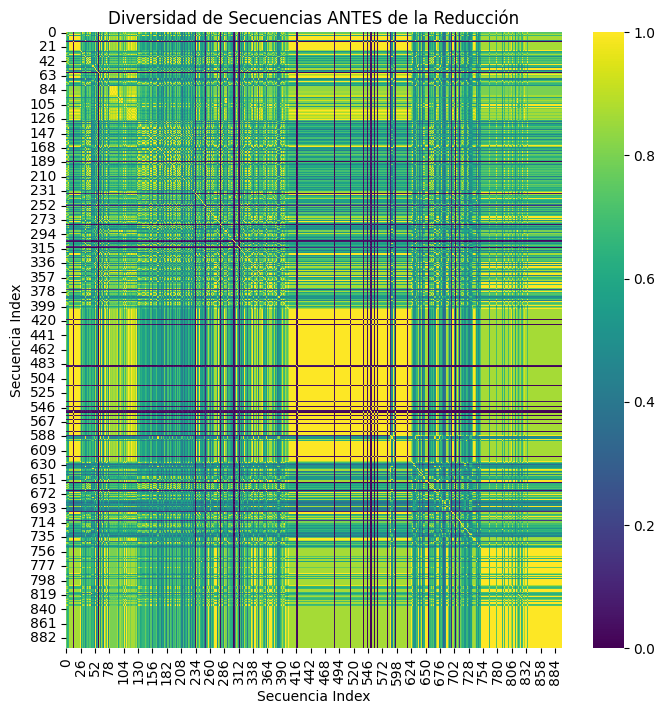

In [13]:
# --- Ejecución ---
# 1. Extraer la lista de secuencias
sequences_before = df_glp1_sec_activa['sequence'].tolist()

# 2. Calcular la matriz
print("Calculando matriz de identidad ANTES de CD-HIT...")
identity_matrix_before = calculate_identity_matrix(sequences_before)

# 3. Visualizar el mapa de calor
plot_identity_heatmap(identity_matrix_before, 'Diversidad de Secuencias ANTES de la Reducción')

Calculando matriz de identidad DESPUÉS de CD-HIT...


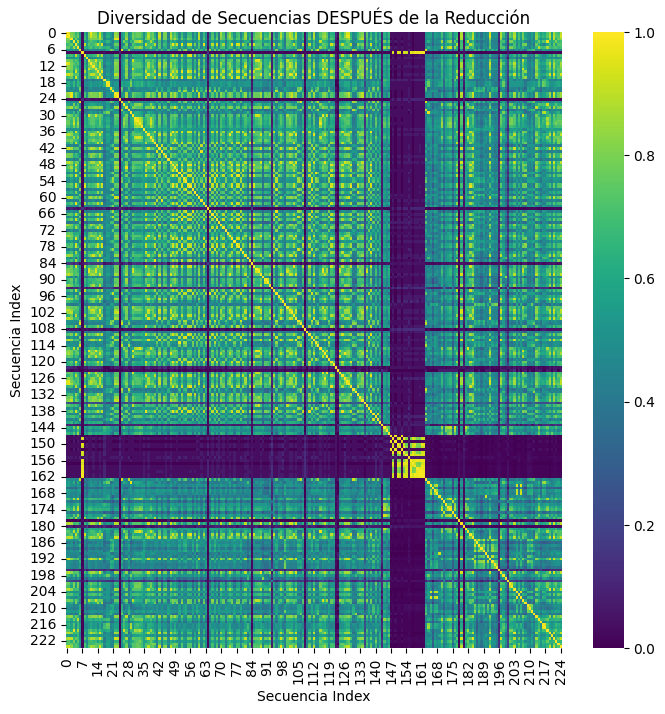

In [14]:
# --- Ejecución ---
# 1. Extraer la lista de secuencias
sequences_after = df_cdhit['sequence'].tolist()

# 2. Calcular la matriz
print("Calculando matriz de identidad DESPUÉS de CD-HIT...")
identity_matrix_after = calculate_identity_matrix(sequences_after)

# 3. Visualizar el mapa de calor
plot_identity_heatmap(identity_matrix_after, 'Diversidad de Secuencias DESPUÉS de la Reducción')

## Cálculo de propiedades Físico - químicas

## Composition enhanced Transition and Distribution CTD

## Repetitive Residue Information (RRI)

## Analisis ce Componentes Principales PCA

## Conclusiones

## Referencias